# Group Project - Machine Intelligence and Society 2023

### Important Notice

<!-- Markdown!!! -->
The project is about basic machine learning methods and fairness in machine learning associated with the Machine Intelligence and Society 2023 course. The members of this group is following:

<!-- Markdown!!! -->
<!-- 각자 파트/student ID/이름 스펠링 확인!! -->

| Matrikelnummer|  Name        | Responsibility    |    Program                                 |
|:-------------:|:------------:|:-----------------:|:------------------------------------------:|
|    03700000   |  Mingi Kang  |   report /        | Bachelor Elektro- und Informationstechnik  |
|    03722924   |  Semin Kim   | analysis / report | Bachelor Elektro- und Informationstechnik  |
|    03700000   |  Seyoung Kim | research / report | Bachelor Elektro- und Informationstechnik  |
|    03745303   | Taeyoung Kim |    programming    | Bachelor Elektro- und Informationstechnik  |


## INTRODUCTION OF THIS PROJECT

The provided dataset is a subset of the [North Carolina Policing Dataset](https://openpolicing.stanford.edu/data/). 
This includes to identify and deal with any outliers, missing values etc. and to encode and scale features appropriately and the task is to classify if a person will be arrested or not. This project consists of a total of 4 modules: preprocessing, training, validation and testing.

## PREPROCESSING 

In [121]:
# Remove unnecessary code before submit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
#Read data
df = pd.read_csv("NC_policing.csv")

#### Check the component of dataset with method `'info'` , `'head'` and `'unique'`.

In [123]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402087 entries, 0 to 402086
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   state               402087 non-null  object 
 1   stop_date           402087 non-null  object 
 2   driver_gender       402087 non-null  object 
 3   driver_age          401996 non-null  float64
 4   driver_race_raw     402087 non-null  object 
 5   driver_race         402087 non-null  object 
 6   violation           402087 non-null  object 
 7   search_type         402087 non-null  object 
 8   contraband_found    402087 non-null  bool   
 9   stop_outcome        402087 non-null  object 
 10  search_basis        402087 non-null  object 
 11  officer_id          402087 non-null  int64  
 12  drugs_related_stop  4379 non-null    object 
 13  district            402049 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 40.3+ MB


,state,stop_date,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district
0,NC,2000-07-31,M,23.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
1,NC,2000-07-31,F,29.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
2,NC,2000-07-31,F,49.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
3,NC,2000-07-31,M,29.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
4,NC,2000-07-31,M,24.0,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3


In [124]:
# Show the number of unique values
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

state: 1 unique values
stop_date: 5632 unique values
driver_gender: 2 unique values
driver_age: 83 unique values
driver_race_raw: 10 unique values
driver_race: 5 unique values
violation: 8 unique values
search_type: 6 unique values
contraband_found: 2 unique values
stop_outcome: 2 unique values
search_basis: 33 unique values
officer_id: 3018 unique values
drugs_related_stop: 1 unique values
district: 57 unique values


In [125]:
#Check the unique values of all data.
for col in df:
    print(df[col].unique())

['NC']
['2000-07-31' '2000-08-01' '2000-08-02' ... '2015-12-29' '2015-12-30'
 '2015-12-31']
['M' 'F']
[23. 29. 49. 24. 21. 33. 16. 28. 39. 68. 20. 40. 50. 57. 38. 46. 34. 44.
 22. 36. 53. 32. 15. 27. 26. 41. 48. 25. 47. 42. 52. 17. 76. 61. 31. 30.
 64. 37. 19. 51. 18. 35. 59. 73. 43. 45. 66. 65. 54. 58. 55. 75. 63. 56.
 60. 81. 62. 77. 67. 69. 87. 70. 71. 78. 74. 85. 72. 79. 93. 80. 89. nan
 82. 84. 91. 83. 90. 88. 86. 92. 98. 99. 94. 96.]
['W N' 'B N' 'U H' 'W H' 'I N' 'U N' 'A N' 'A H' 'B H' 'I H']
['White' 'Black' 'Hispanic' 'Other' 'Asian']
['Speeding' 'DUI' 'Equipment' 'Seat belt' 'Other' 'Registration/plates'
 'Safe movement' 'Stop sign/light']
['No Search Conducted' 'Protective Frisk' 'Incident to Arrest' 'Consent'
 'Probable Cause' 'Warrant']
[False  True]
['Arrest' 'No Action']
['No Search Conducted' 'Observation Suspected Contraband'
 'Erratic Suspicious Behaviour' 'Other Official Info'
 'Suspicious Movement' 'Witness Observation' 'Informant Tip'
 'Observation Suspected Contr

#### Processing the missing values 
+ Fill missing values in `'driver_age'` Column with average value.

In [126]:
#Fill missing values in 'drivers_age' with mean
mean_age = df['driver_age'].mean()
print("Average age is :", mean_age)

Average age is : 41.878103264709104


In [127]:
#All missing values in 'driver_age' fills with average mean
#It was rounded at 소수첫째자리 반올림
df['driver_age'] = df['driver_age'].fillna(int(np.rint(mean_age)))

#Check ob tere are antother missing values
df.isna().sum()

state                      0
stop_date                  0
driver_gender              0
driver_age                 0
driver_race_raw            0
driver_race                0
violation                  0
search_type                0
contraband_found           0
stop_outcome               0
search_basis               0
officer_id                 0
drugs_related_stop    397708
district                  38
dtype: int64

### Now, we will make a copy of **df** for preprocessing. 

#### An overview of preprocessing is here.
+ Remove some columns : `'drugs_related_stop'`, `'state'`, `'officer_id'`, `'district'`

+ `'stop_date'` : Convert to datetime format, use only `'day_of_week'`
+ `'contraband_found'` : Encode it with **Label Encoder**.
+ `'violation'` : Encode it with **One-Hot Encoder**.
+ `'driver_race_raw'`: Remove this column and use only `'driver_race'` after **One-Hot** encoding.
+ `'search_basis'` : Remove this column and use only `'search_type'` after **One-Hot** encoding.
+ `'driver_gender'` : Encode it with **Label Encoder**.

In [128]:
# Copy the original data.
df_encoded = df.copy()

## Remove some columns.
# 'drugs_related_stop' : many NaN values.
# 'state' : all data has same values.
df_encoded = df_encoded.drop(['drugs_related_stop','state'], axis=1)

# Not used Columns are removed
df_encoded.drop(['officer_id', 'district'], axis=1, inplace=True)

#### How we convert the column `'stop_date'` to datetime format

> 1. Change format
> 2. Inspect tendency & (necessary or not)
> 3. Conclusion : Remove drop year, month and day, but day of week can be used.

In [129]:
## Convert 'stop_date' to datetime format
df_encoded['stop_date'] = pd.to_datetime(df_encoded['stop_date'])

# Extract year, month, day, and day of the week
df_encoded['year'] = df_encoded['stop_date'].dt.year
df_encoded['month'] = df_encoded['stop_date'].dt.month
df_encoded['day'] = df_encoded['stop_date'].dt.day
df_encoded['day_of_week'] = df_encoded['stop_date'].dt.dayofweek  # Monday=0, Sunday=6

# Drop the original 'stop_date' column 
df_encoded = df_encoded.drop('stop_date', axis=1)

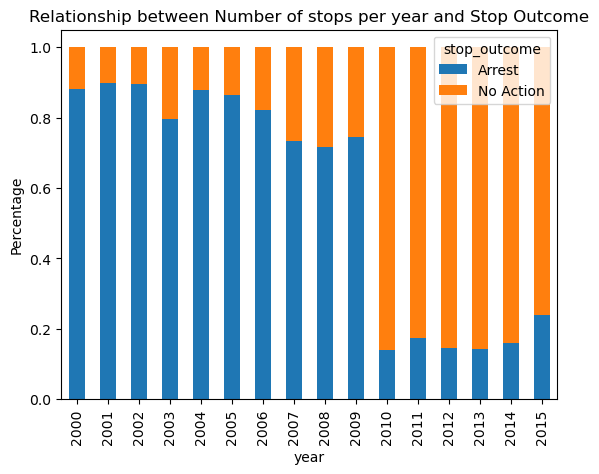

In [130]:
## Plot for Relationship between Number of `stops per year` and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['year'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True)
plt.title('Relationship between Number of stops per year and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

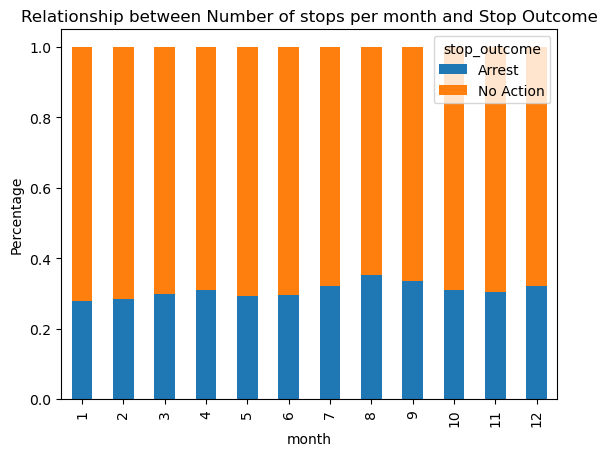

In [131]:
## Plot for Relationship between Number of `stops per month` and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['month'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True)
plt.title('Relationship between Number of stops per month and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

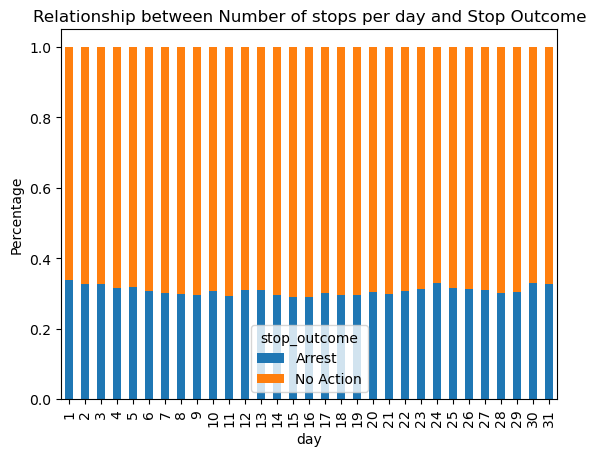

In [132]:
## Plot for Relationship between Number of `stops per day` and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['day'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True)
plt.title('Relationship between Number of stops per day and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

In [133]:
# Drop unnecessary columns
df_encoded = df_encoded.drop(['year','month','day'], axis=1)

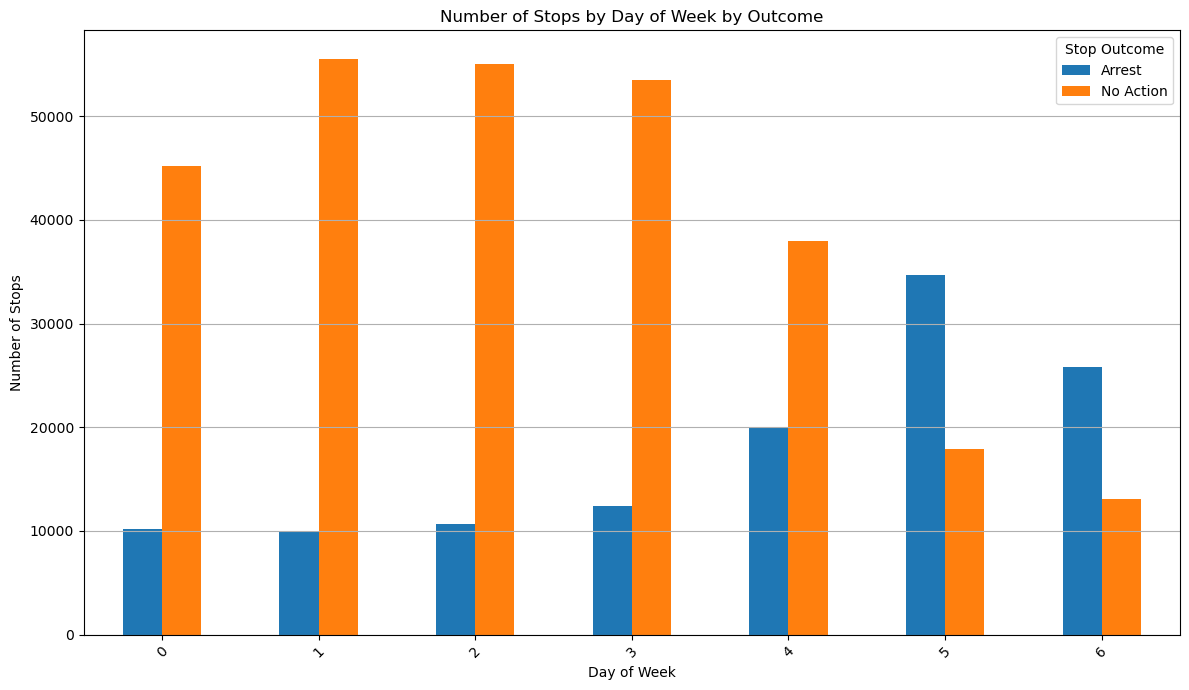

In [134]:
## Plot for Relationship between Number of `stops by day of week` and Stop Outcome

# Group by year and stop_outcome and count the occurrences
grouped = df_encoded.groupby(['day_of_week', 'stop_outcome']).size().unstack().fillna(0)

# Plot the data using grouped bar graph
grouped.plot(kind='bar', figsize=(12,7))
plt.title('Number of Stops by Day of Week by Outcome')
plt.xlabel('Day of Week')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Stop Outcome')
plt.show()

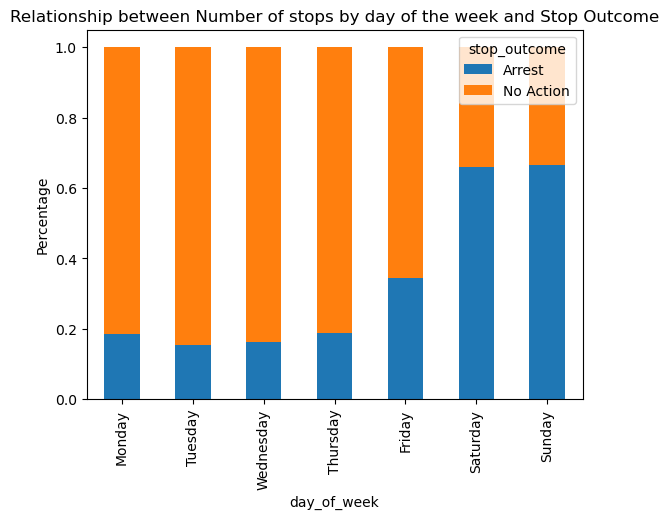

In [135]:
## Another Plot

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['day_of_week'], df_encoded['stop_outcome'], normalize='index')

# Plot of day of week and stop outcome
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crosstab_normalized.plot(kind='bar', stacked=True)
plt.xticks(ticks=np.arange(7), labels=days)
plt.title('Relationship between Number of stops by day of the week and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

#### Plot the column `'contraband_found'`  with bar graph and encode it with *Label Encoder*.

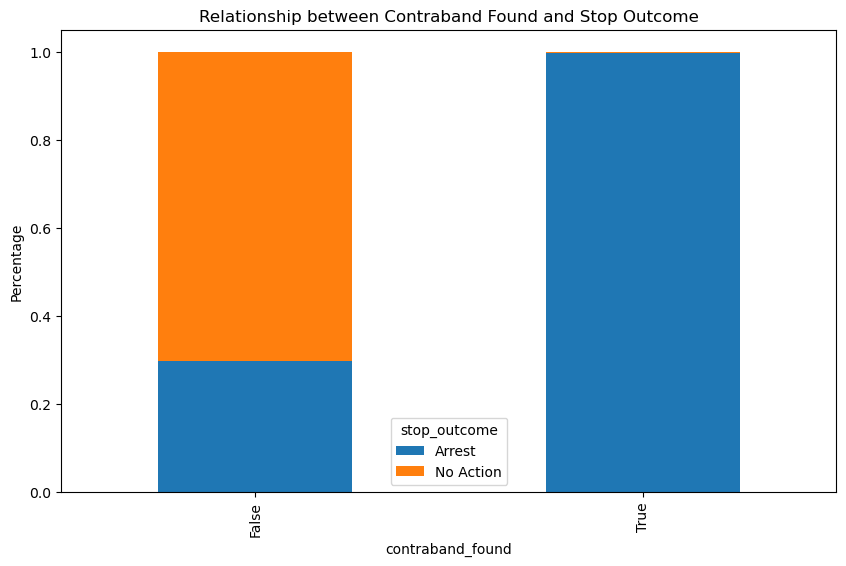

In [136]:
## Plot for Relationship between Contraband Found and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['contraband_found'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Contraband Found and Stop Outcome')
plt.ylabel('Percentage')
plt.show()


In [137]:
# Initialize label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encode 'contraband_found' column
df_encoded['contraband_found'] = le.fit_transform(df_encoded['contraband_found'])

In [138]:
# Check the data set
df_encoded.head()

,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,day_of_week
0,M,23.0,W N,White,Speeding,No Search Conducted,0,Arrest,No Search Conducted,0
1,F,29.0,W N,White,Speeding,No Search Conducted,0,Arrest,No Search Conducted,0
2,F,49.0,B N,Black,Speeding,No Search Conducted,0,Arrest,No Search Conducted,0
3,M,29.0,B N,Black,Speeding,No Search Conducted,0,Arrest,No Search Conducted,0
4,M,24.0,U H,Hispanic,Speeding,No Search Conducted,0,Arrest,No Search Conducted,0


####  Plot the column `'violation'` with bar graph and encode it with *One-Hot Encoder*.

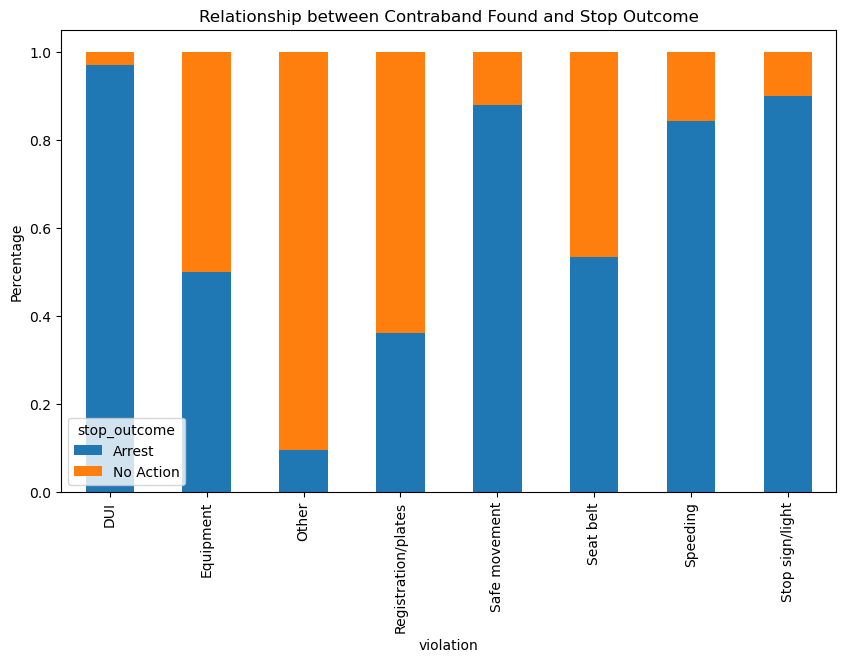

In [139]:
## Plot for Relationship between Violation and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['violation'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Contraband Found and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

In [140]:
# One-hot encoding
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded['violation'], prefix='violation')], axis=1)

# Drop the original 'violation' column and the 'violation_DUI' column
df_encoded.drop(['violation'], axis=1, inplace=True)

####  Similarity check between `'driver_race'` and `'driver_race_raw'`  with Cross-Tabulation

> When comparing the `'driver_race'` and `'driver_race_raw'` columns by percentile in a heatmap, we can observe that they are almost similar columns. So we removed `'driver_race_raw'` columns to avoid Multicollinearity.

In [141]:
#Check if driver_race_raw communicates anything specific about the sample
print("Relationship between 'driver_race' and 'driver_race_raw':\n",df.groupby(["driver_race", "driver_race_raw"]).size())

Relationship between 'driver_race' and 'driver_race_raw':
 driver_race  driver_race_raw
Asian        A N                  1775
Black        B N                102919
Hispanic     A H                    30
             B H                   422
             I H                    57
             U H                 26727
             W H                  3479
Other        I N                  3666
             U N                  4487
White        W N                258525
dtype: int64


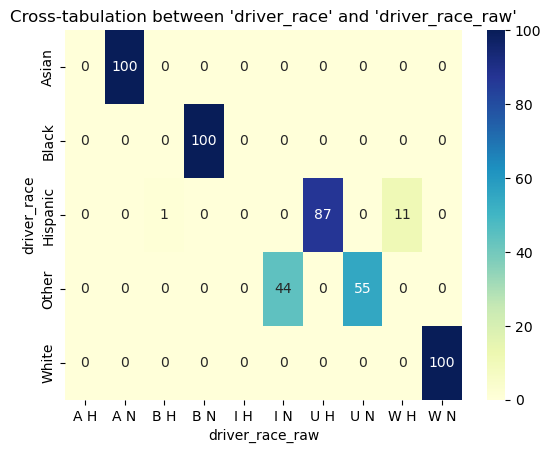

In [142]:
# Heatmap
ct = pd.crosstab(df['driver_race'], df['driver_race_raw'])
ct_percent = ct.div(ct.sum(axis=1), axis=0)
ct_percent_int = (ct_percent * 100).astype(int)
plt.figure()
sns.heatmap(ct_percent_int, annot=True, fmt='d', cmap="YlGnBu", cbar=True)
plt.title('Cross-tabulation between \'driver_race\' and \'driver_race_raw\'')
plt.show()

In [143]:
# Drop 'driver_race_raw'
df_encoded = df_encoded.drop('driver_race_raw', axis=1)

# One-hot encode 'driver_race' 
driver_race_dummies = pd.get_dummies(df_encoded['driver_race'], prefix='driver_race')
df_encoded = pd.concat([df_encoded, driver_race_dummies], axis=1)

# Drop the original 'driver_race' column from df_encoded
df_encoded = df_encoded.drop('driver_race', axis=1)

In [144]:
# Check the data set
df_encoded.head()

,driver_gender,driver_age,search_type,contraband_found,stop_outcome,search_basis,day_of_week,violation_DUI,violation_Equipment,violation_Other,violation_Registration/plates,violation_Safe movement,violation_Seat belt,violation_Speeding,violation_Stop sign/light,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White
0,M,23.0,No Search Conducted,0,Arrest,No Search Conducted,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,F,29.0,No Search Conducted,0,Arrest,No Search Conducted,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,F,49.0,No Search Conducted,0,Arrest,No Search Conducted,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,M,29.0,No Search Conducted,0,Arrest,No Search Conducted,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,M,24.0,No Search Conducted,0,Arrest,No Search Conducted,0,0,0,0,0,0,0,1,0,0,0,1,0,0


#### Similarity Check due to appropriate temporal relationship

> Since the information in `'search_type'` inherently encompasses the information in `'search_basis'` in a temporal order, it is not appropriate to duplicate the usage of `'search_basis'`. For column `'search_type'` we use **One-Hot** Encoding.


In [145]:
## Remove `search_basis` columns
# Drop the original 'search_basis' colum from `df_encoded`
df_encoded = df_encoded.drop('search_basis', axis=1)

In [146]:
# One-hot encoding for 'search_type'
dummies = pd.get_dummies(df_encoded['search_type'], prefix='search_type')

# Concatenate the one-hot encoded columns to df_encoded
df_encoded = pd.concat([df_encoded, dummies], axis=1)

# Drop the original 'search_type' column
df_encoded = df_encoded.drop('search_type', axis=1)

In [147]:
df_encoded.head().T

,0,1,2,3,4
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
contraband_found,0,0,0,0,0
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
day_of_week,0,0,0,0,0
violation_DUI,0,0,0,0,0
violation_Equipment,0,0,0,0,0
violation_Other,0,0,0,0,0
violation_Registration/plates,0,0,0,0,0
violation_Safe movement,0,0,0,0,0


#### For the column `'driver_gender'` we encoded it with **Label Encoder** 

In [148]:
# Label encoding for binary columns 
encoder = LabelEncoder()
df_encoded.loc[:,'driver_gender'] = encoder.fit_transform(df_encoded.loc[:,'driver_gender'])

/var/folders/8y/gcrnzpp17kj_68w30t1fyf1r0000gn/T/ipykernel_52834/282758503.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_encoded.loc[:,'driver_gender'] = encoder.fit_transform(df_encoded.loc[:,'driver_gender'])


### Preprocessing completed with 24 colums 

In [149]:
# Check all encoded data set last time
df_encoded.head().T

,0,1,2,3,4
driver_gender,1,0,0,1,1
driver_age,23.0,29.0,49.0,29.0,24.0
contraband_found,0,0,0,0,0
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
day_of_week,0,0,0,0,0
violation_DUI,0,0,0,0,0
violation_Equipment,0,0,0,0,0
violation_Other,0,0,0,0,0
violation_Registration/plates,0,0,0,0,0
violation_Safe movement,0,0,0,0,0


In [150]:
#Check ob tere are antother missing values
df_encoded.isna().sum()

driver_gender                      0
driver_age                         0
contraband_found                   0
stop_outcome                       0
day_of_week                        0
violation_DUI                      0
violation_Equipment                0
violation_Other                    0
violation_Registration/plates      0
violation_Safe movement            0
violation_Seat belt                0
violation_Speeding                 0
violation_Stop sign/light          0
driver_race_Asian                  0
driver_race_Black                  0
driver_race_Hispanic               0
driver_race_Other                  0
driver_race_White                  0
search_type_Consent                0
search_type_Incident to Arrest     0
search_type_No Search Conducted    0
search_type_Probable Cause         0
search_type_Protective Frisk       0
search_type_Warrant                0
dtype: int64

### Separate target value  `'stop_outcome'`

In [151]:
# Target y variables
y = df_encoded['stop_outcome']
y_enc = le.fit_transform(y)

# Remove the original column
df_encoded = df_encoded.drop('stop_outcome',axis=1)

In [152]:
# Print of output value
pd.DataFrame(data=le.transform(le.classes_),index=le.classes_,columns=['Output'])

,Output
Arrest,0
No Action,1


In [153]:
# Check
df_encoded.head()

,driver_gender,driver_age,contraband_found,day_of_week,violation_DUI,violation_Equipment,violation_Other,violation_Registration/plates,violation_Safe movement,violation_Seat belt,...,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,search_type_Consent,search_type_Incident to Arrest,search_type_No Search Conducted,search_type_Probable Cause,search_type_Protective Frisk,search_type_Warrant
0,1,23.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,29.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,49.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,29.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1,24.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


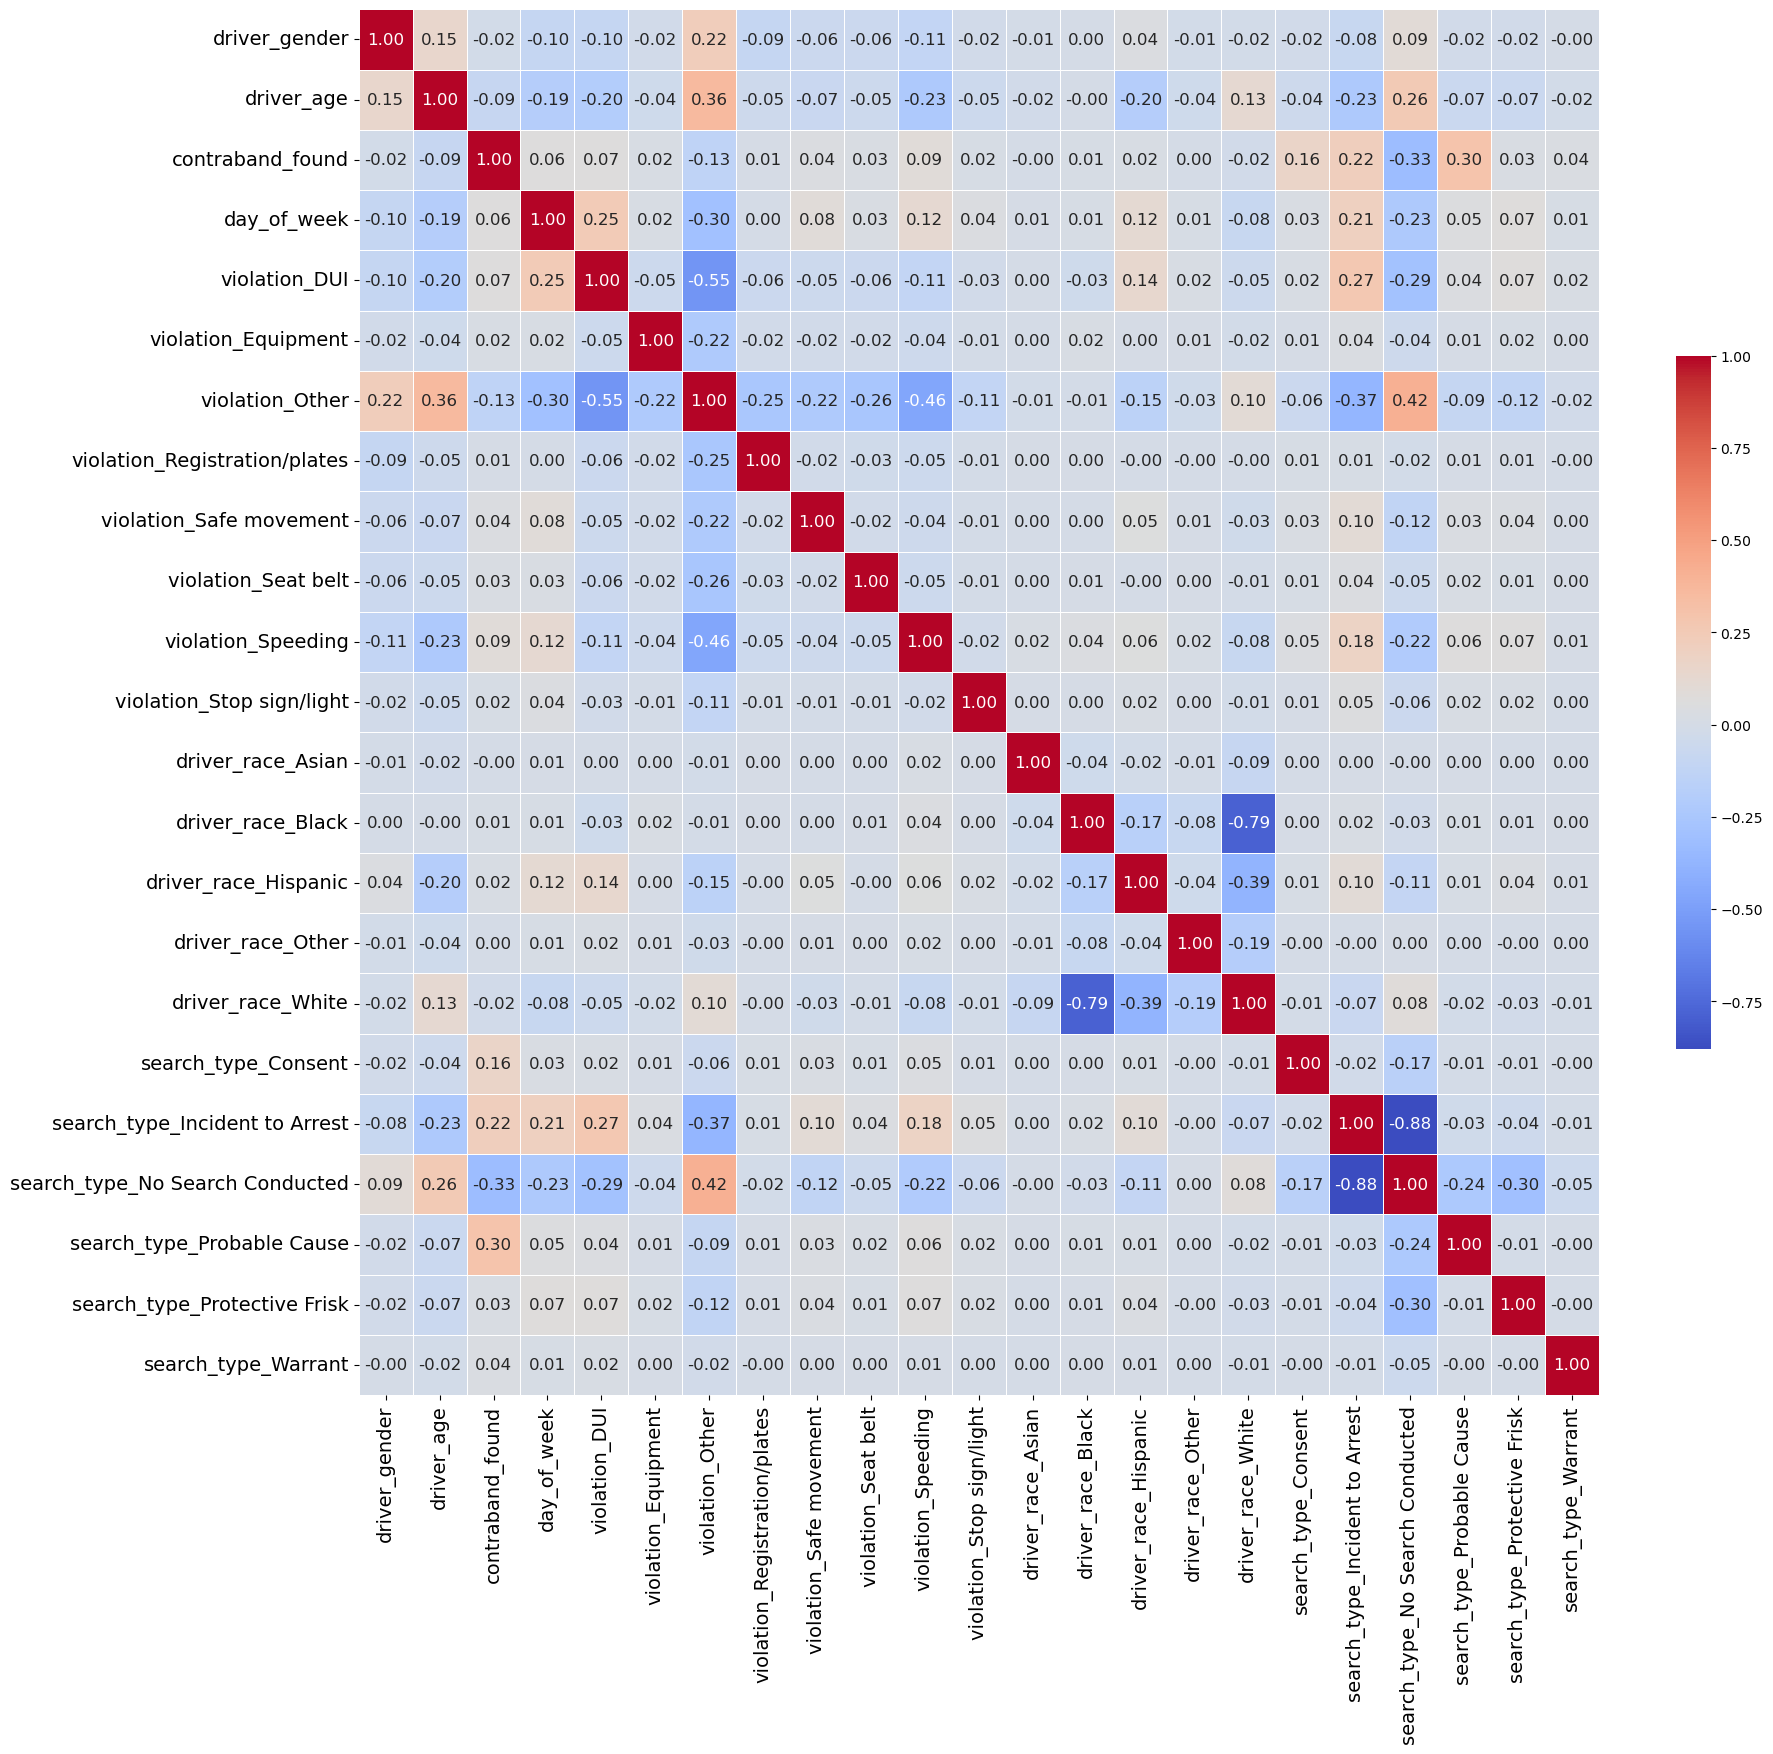

In [154]:
## Observe Correlation Matrix

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr = df_encoded.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5, cbar_kws={"shrink": .5}, 
            annot_kws={"size": 12})  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()


> After examining the correlation matrix, we could drop features based on high correlations (multicollinearity). However, there are no high correlations so we will use all features.

In [155]:
# REMOVE
df_encoded.head().T

,0,1,2,3,4
driver_gender,1.0,0.0,0.0,1.0,1.0
driver_age,23.0,29.0,49.0,29.0,24.0
contraband_found,0.0,0.0,0.0,0.0,0.0
day_of_week,0.0,0.0,0.0,0.0,0.0
violation_DUI,0.0,0.0,0.0,0.0,0.0
violation_Equipment,0.0,0.0,0.0,0.0,0.0
violation_Other,0.0,0.0,0.0,0.0,0.0
violation_Registration/plates,0.0,0.0,0.0,0.0,0.0
violation_Safe movement,0.0,0.0,0.0,0.0,0.0
violation_Seat belt,0.0,0.0,0.0,0.0,0.0


## TRAINING

## Classifiers
+ Logistic Regression
+ K-Nearest Neighbors

### Train-test Split

In [156]:
## Train-Test Split
#Import necesary Libraries
from sklearn.model_selection import train_test_split

X = df_encoded

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y_enc, test_size=0.2, random_state=42)

### Logistic Regression

In [157]:
# Standardizing Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [158]:
# Initialize a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training
ini_log_reg = LogisticRegression(max_iter=1000)
ini_log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [159]:
# Predict on test set
ini_y_pred_test = ini_log_reg.predict(X_test_scaled)

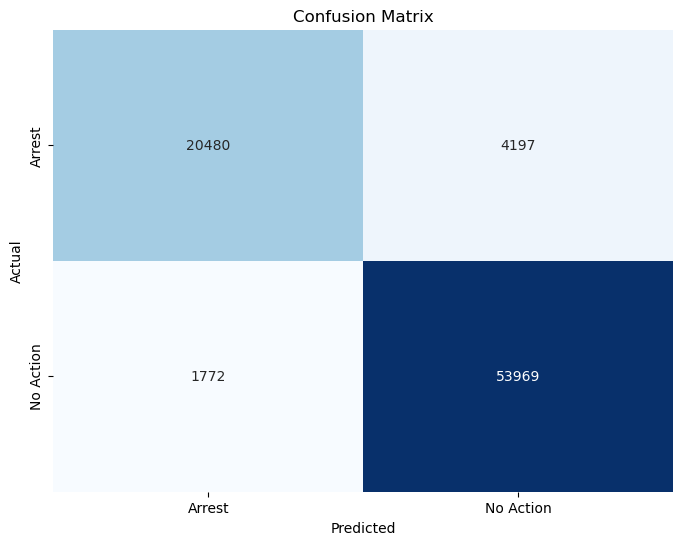

In [160]:
## confusion Matrix
# Import necessary libararies
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# compute confusion matrix
labels = ['Arrest', 'No Action']
ini_cm = confusion_matrix(y_test, ini_y_pred_test)

# ploting
plt.figure(figsize=(8, 6))
sns.heatmap(ini_cm, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 800x600 with 0 Axes>

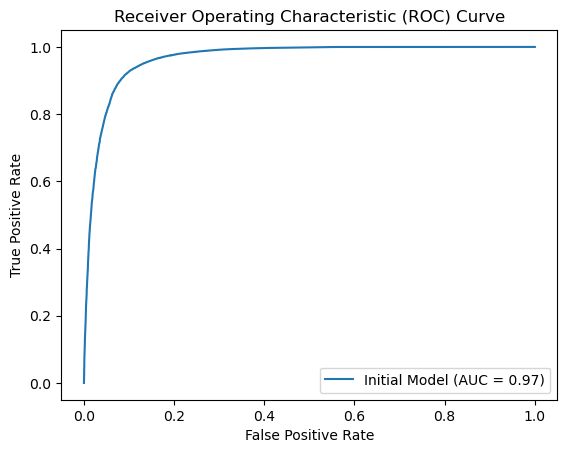

In [161]:
## ROC Curve and AUC
#Import necessary libararies
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

# Compute ROC curve and ROC
ini_fpr, ini_tpr, _ = roc_curve(y_test, ini_log_reg.predict_proba(X_test_scaled)[:, 1])
ini_roc_auc = auc(ini_fpr, ini_tpr)


plt.figure(figsize=(8, 6))
ini_display = RocCurveDisplay(fpr=ini_fpr, tpr=ini_tpr, roc_auc=ini_roc_auc, estimator_name='Initial Model')
ini_display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

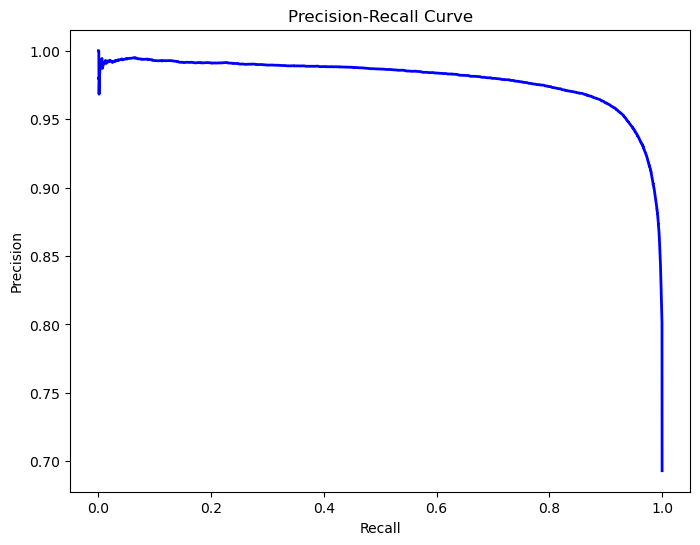

In [162]:
## Precision-Recall curve
from sklearn.metrics import precision_recall_curve

ini_precision, ini_recall, _ = precision_recall_curve(y_test, ini_log_reg.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(ini_recall, ini_precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

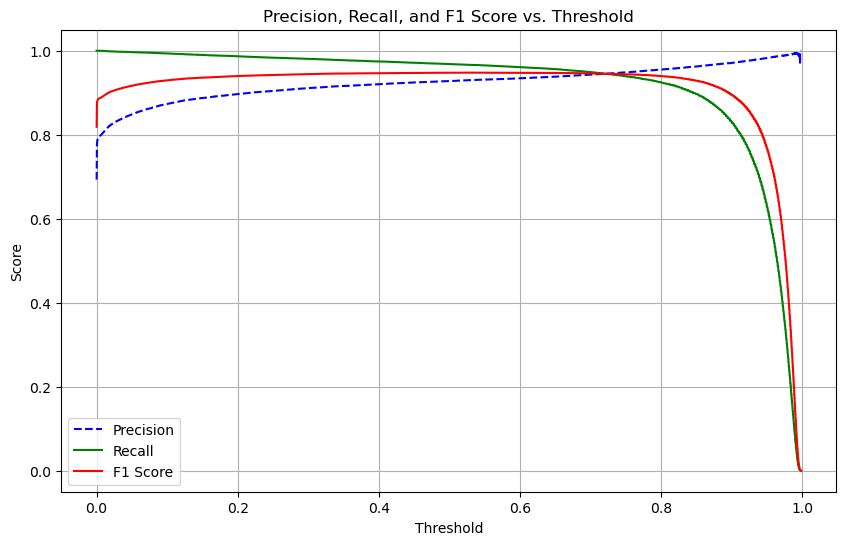

In [163]:
## F1-Score
# Import necessary libraries
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# Get the probability estimates of the positive class
ini_y_scores = ini_log_reg.predict_proba(X_test_scaled)[:, 1]

# Get precision-recall values for different thresholds
ini_precision, ini_recall, ini_thresholds = precision_recall_curve(y_test, ini_y_scores)

# Calculate F1 score
ini_f1_scores = 2*(ini_precision * ini_recall)/(ini_precision + ini_recall)


plt.figure(figsize=(10, 6))
plt.plot(ini_thresholds, ini_precision[:-1], 'b--', label='Precision')
plt.plot(ini_thresholds, ini_recall[:-1], 'g-', label='Recall')
plt.plot(ini_thresholds, ini_f1_scores[:-1], 'r-', label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [164]:
# Calculate Accuracy
from sklearn.metrics import accuracy_score

ini_accuracy = accuracy_score(y_test, ini_y_pred_test)

print(f"Accuracy of logistic regression model: {ini_accuracy:.8f}")

Accuracy of logistic regression model: 0.92577532


### K-Nearlest- Neighbors

In [165]:
from sklearn.model_selection import train_test_split

X = df_encoded

# Initial split: Train - Test (80% - 20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

# Further split the temporary train set into Train - Validation (80% - 20%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

#### Make Encoding Label List for KDE Plot

In [166]:
# ENCODING LABEL LIST
# For driver_gender
gender_enc = {0:'F', 1:'M'}

# For contraband_found
contraband_enc = {0:'False', 1:'True'}

# For day_of_week
days_enc = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# For violation
vio_DUI_enc = {0:'No', 1:'Yes'}
vio_Equipment_enc = {0:'No', 1:'Yes'}
vio_Other_enc = {0:'No', 1:'Yes'}
vio_Registration_enc  = {0:'No', 1:'Yes'}
vio_SafeMove_enc = {0:'No', 1:'Yes'}
vio_Seatbelt_enc = {0:'No', 1:'Yes'}
vio_Speeding_enc = {0:'No', 1:'Yes'}
vio_Stopsign_enc = {0:'No', 1:'Yes'}

# For driver_race
driver_race_Asian_enc = {0:'No', 1:'Yes'}
driver_race_Black_enc = {0:'No', 1:'Yes'}
driver_race_Hispanic_enc = {0:'No', 1:'Yes'}
driver_race_Other_enc = {0:'No', 1:'Yes'}
driver_race_White_enc = {0:'No', 1:'Yes'}

# For search_type
search_type_Consent_enc = {0:'No', 1:'Yes'}
search_type_Incident_to_Arrest_enc = {0:'No', 1:'Yes'}
search_type_NoSearchConducted_enc = {0:'No', 1:'Yes'}
search_type_ProbableCause_enc = {0:'No', 1:'Yes'}
search_type_ProtectiveFrisk_enc = {0:'No', 1:'Yes'}
search_type_Warrant_enc = {0:'No', 1:'Yes'}

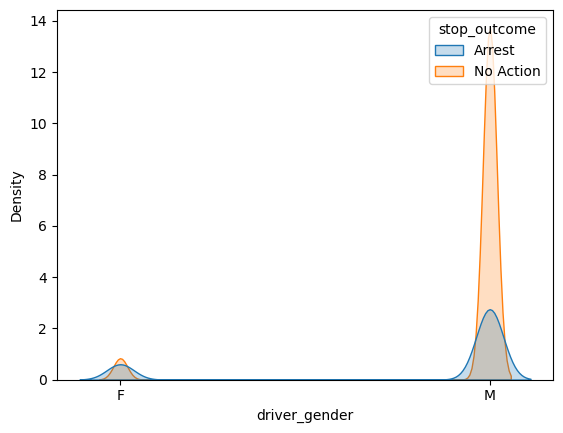

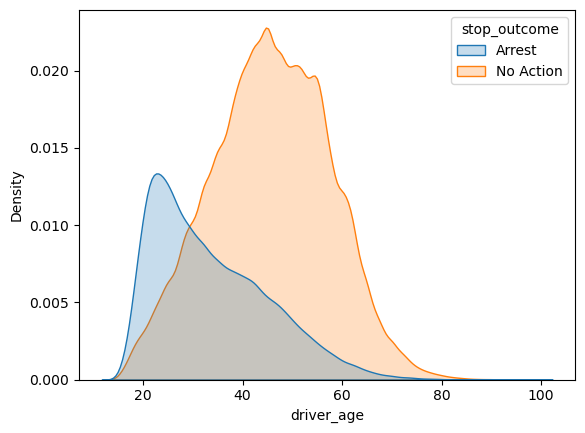

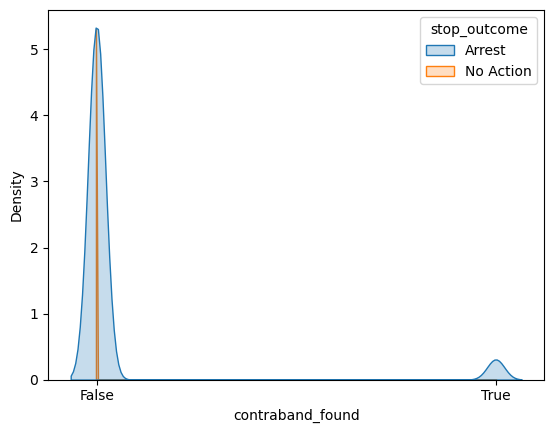

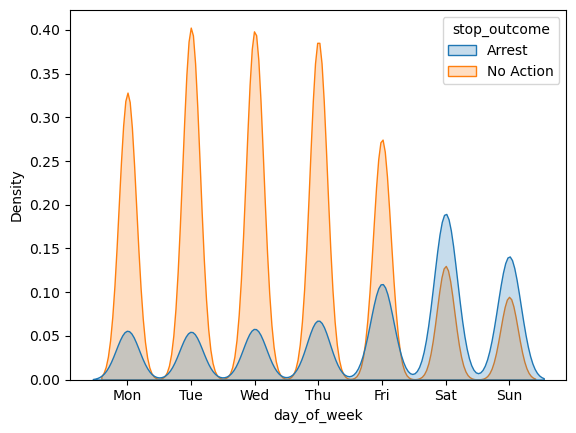

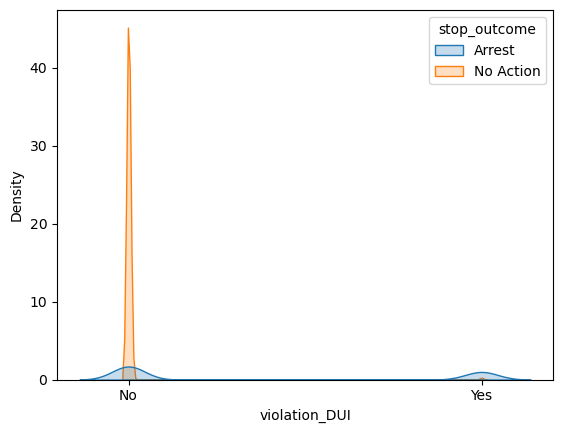

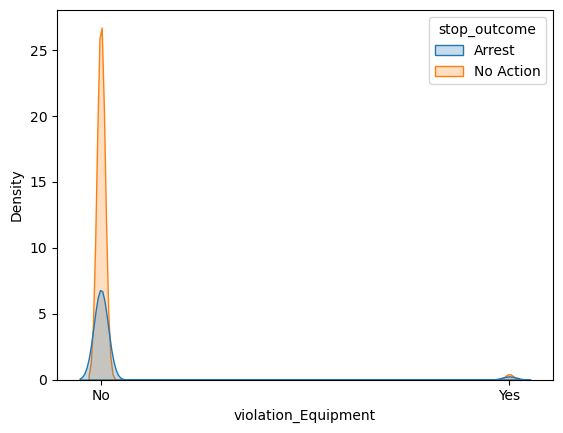

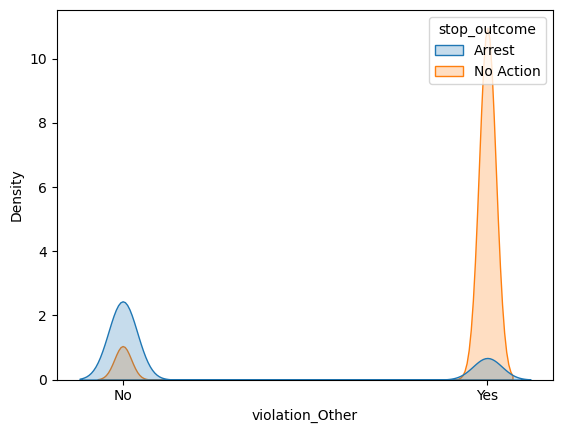

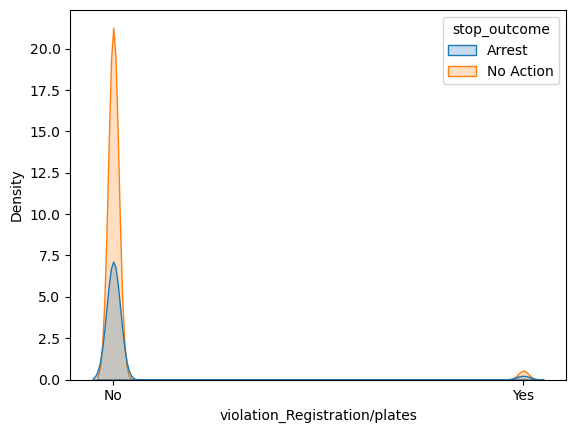

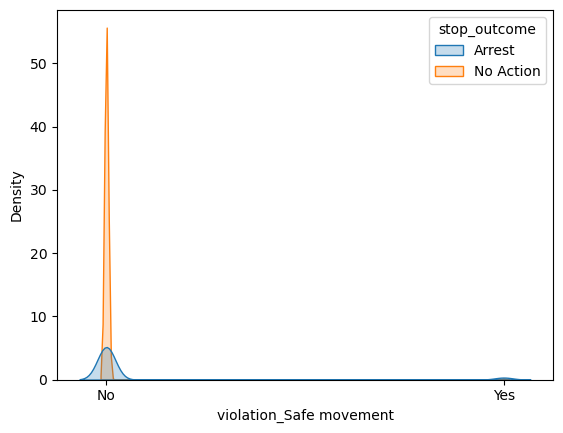

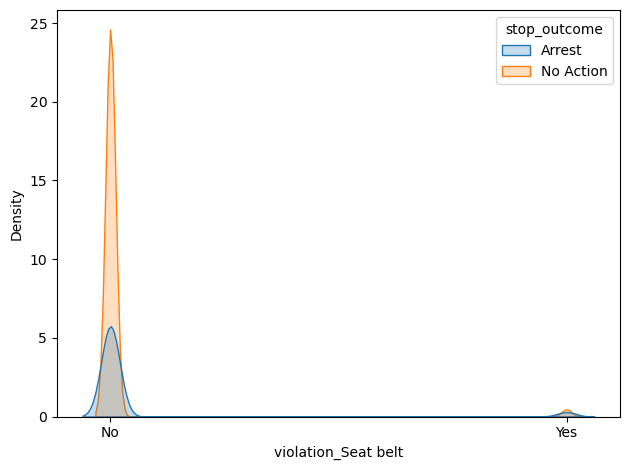

In [167]:
# Master Encoding Dictionary
encoding_dict = { 'driver_gender': gender_enc, 'contraband_found': contraband_enc, 'day_of_week': days_enc,
    'violation_DUI': vio_DUI_enc, 'violation_Equipment': vio_Equipment_enc, 'violation_Other': vio_Other_enc,
    'violation_Registration/plates': vio_Registration_enc, 'violation_Safe movement': vio_SafeMove_enc,
    'violation_Seat belt': vio_Seatbelt_enc,'violation_Speeding': vio_Speeding_enc,'violation_Stopsign': vio_Stopsign_enc,
    'driver_race_Asian': driver_race_Asian_enc,'driver_race_Black': driver_race_Black_enc, 'driver_race_Hispanic': driver_race_Hispanic_enc,
    'driver_race_Other': driver_race_Other_enc,'driver_race_White': driver_race_White_enc,'search_type_Consent': search_type_Consent_enc,
    'search_type_Incident to Arrest': search_type_Incident_to_Arrest_enc,'search_type_No Search Conducted': search_type_NoSearchConducted_enc,
    'search_type_Probable Cause': search_type_ProbableCause_enc,'search_type_Protective Frisk': search_type_ProtectiveFrisk_enc,
    'search_type_Warrant': search_type_Warrant_enc,
}

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot kde
for i, (column, color) in enumerate(zip(X_train.columns, sns.color_palette())):
    plt.figure(i)
    sns.kdeplot(x=column, fill=True, hue=y, data=X, color=color)
    
    if column in encoding_dict:
        plt.xticks(list(encoding_dict[column].keys()), list(encoding_dict[column].values()))
        
plt.tight_layout()
plt.show()

## command + / : make/recove comment short cut


In [168]:
# ## Normalizing Data
# # Import necessary libraries
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

In [169]:
# ## Training knn model
# # Import necessary libraries
# from sklearn.neighbors import KNeighborsClassifier


# # Initialize KNN classifier with default parameters (for initial model)
# knn = KNeighborsClassifier()

# # Training
# knn.fit(X_train_scaled, y_train)

In [170]:
# # Predict using trained model

# # For validation set
# y_val_pred = knn.predict(X_val_scaled)

# # For test set (only for evaluate, not during tuning)
# y_test_pred = knn.predict(X_test_scaled)

In [171]:
# # Plotting actual vs. predicted
# plt.figure(figsize=(10, 6))
# sns.kdeplot(y_val, label="True Values", fill=True)
# sns.kdeplot(y_val_pred, label="Predicted Values", =True)
# plt.title('True vs. Predicted Values')
# plt.legend()
# plt.show()

In [172]:
# ## Confusion Matrix for fine-tuned
# # Import necessary libararies
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # compute confusion matrix
# labels = ['Arrest', 'No Action']
# cm_temp = confusion_matrix(y_val, y_val_pred)

# # ploting
# plt.figure(figsize=(8, 6))
# sns.heatmap(tun_cm, annot=True, fmt='g', cmap='Blues', cbar=False,
#            xticklabels=labels, yticklabels=labels)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

In [173]:
# ## ROC Curve
# from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# fpr_temp, tpr_temp, _ = roc_curve(y_val, y_val_pred)
# roc_auc_temp = auc(fpr_temp, tpr_temp)

# plt.figure(figsize=(8, 6))
# roc_display_temp = RocCurveDisplay(fpr=fpr_temp, tpr=tpr_temp, roc_auc=roc_auc_temp, estimator_name='KNN Model').plot()
# plt.title("ROC Curve")
# plt.show()

In [174]:
# ## Precision-Recall Curve
# from sklearn.metrics import precision_recall_curve

# precision_temp, recall_temp, _ = precision_recall_curve(y_val, knn.predict_proba(X_val_scaled)[:, 1])

# plt.figure(figsize=(8, 6))
# plt.plot(recall_temp, precision_temp, color='b', lw=2)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.show()

In [175]:
# ## F1-Score

# # Get the probability estimates of the positive class
# y_scores_temp = knn.predict_proba(X_val_scaled)[:, 1]

# # Get precision-recall values for different thresholds
# precision_temp, recall_temp, thresholds_temp = precision_recall_curve(y_val, y_scores_temp)

# # Calculate F1 score
# f1_scores_temp = 2 * (precision_temp * recall_temp)/(precision_temp + recall_temp)

# # Plot
# plt.figure(figsize=(10, 6))
# plt.plot(thresholds_temp, precision_temp[:-1], 'b--', label='Precision')
# plt.plot(thresholds_temp, recall_temp[:-1], 'g-', label='Recall')
# plt.plot(thresholds_temp, f1_scores_temp[:-1], 'r-', label='F1 Score')
# plt.xlabel('Threshold')
# plt.ylabel('Score')
# plt.title('Precision, Recall, and F1 Score vs. Threshold')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()

In [176]:
# ## Accuracy Calculation
# accuracy_temp = accuracy_score(y_val, y_val_pred)
# print(f"Accuracy of initial K-Nearlest Neighbors model: {accuracy_temp:.8f}")

### Fine Tuning for KNN Classifier

In [177]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
opt_X_train_scaled = scaler.fit_transform(X_train)
opt_X_val_scaled = scaler.transform(X_val)
opt_X_test_scaled = scaler.transform(X_test)

In [178]:
# Finding optimal k value
# from sklearn.neighbors import KNeighborsClassifier

# Range of k value
# k_values = list(range(1, 50))
# accuracy_scores = []

# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(opt_X_train_scaled, y_train)
#     score = knn.score(opt_X_val_scaled, y_val)
#     accuracy_scores.append(score)

In [179]:
## k = 34
from sklearn.neighbors import KNeighborsClassifier
accuracy_scores = []
k_values = 34
k = k_values

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(opt_X_train_scaled, y_train)
score = knn.score(opt_X_val_scaled, y_val)
accuracy_scores.append(score)

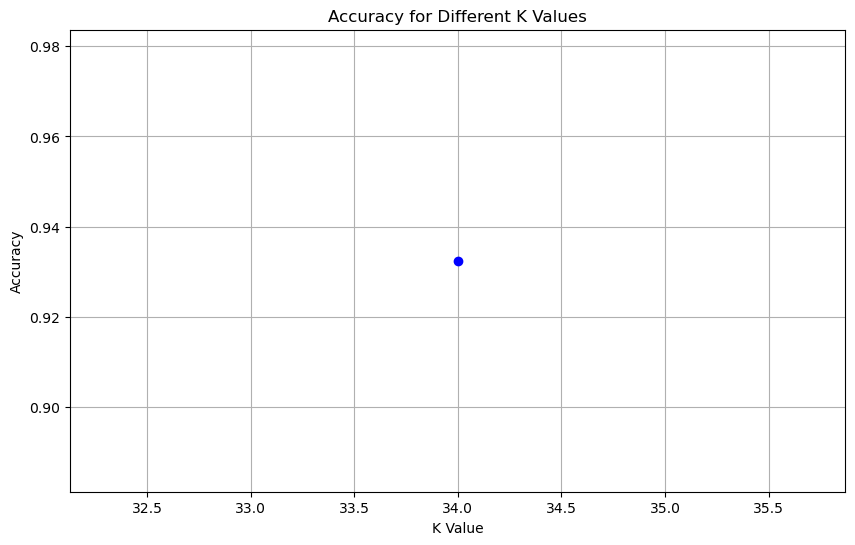

In [180]:
# Plotting accuracy scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different K Values')
plt.grid(True)
plt.show()

In [181]:
# # Get the optimal k value
# optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
# print(f"Optimal k-value: {optimal_k}")

In [182]:
# ## Fitting fine-tuned knn with optimal k value

# # Training final knn with the optimal k-value
# knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
# knn_optimal.fit(opt_X_train_scaled, y_train)  # Changed here

# # Predicting on validation set
# opt_y_val_pred = knn_optimal.predict(opt_X_val_scaled)

In [183]:
## k = 34
optimal_k = 34

# Training final knn with the optimal k-value
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(opt_X_train_scaled, y_train)

# Predicting on validation set
opt_y_val_pred = knn_optimal.predict(opt_X_val_scaled)

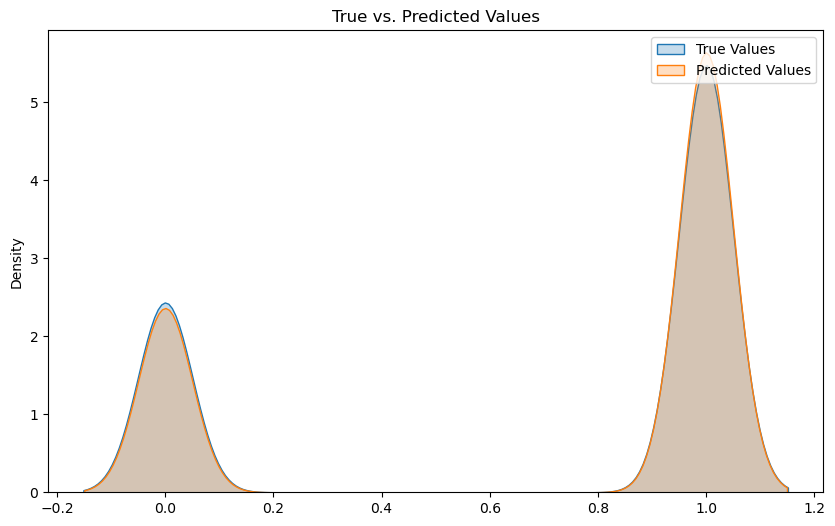

In [184]:
# Plotting actual vs. predicted
plt.figure(figsize=(10, 6))
sns.kdeplot(y_val, label="True Values", fill=True)
sns.kdeplot(opt_y_val_pred, label="Predicted Values", fill=True)
plt.title('True vs. Predicted Values')
plt.legend()
plt.show()

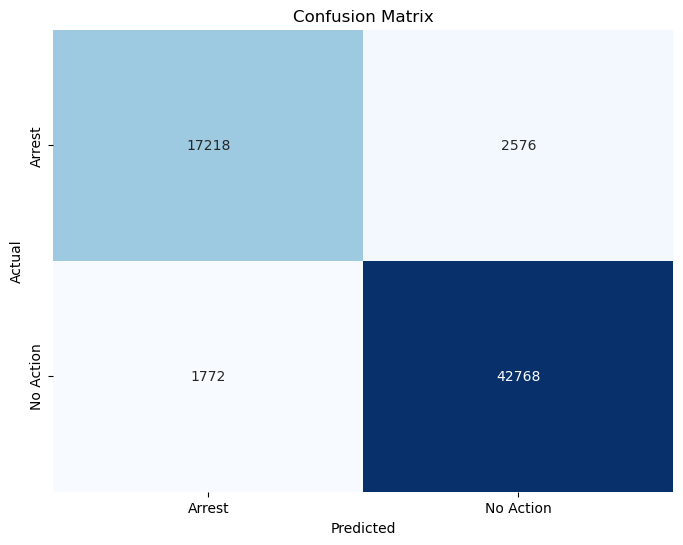

In [185]:
## Confusion Matrix for fine-tuned
# Import necessary libararies
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# compute confusion matrix
labels = ['Arrest', 'No Action']
cm_optimal = confusion_matrix(y_val, opt_y_val_pred)

# ploting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimal, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 800x600 with 0 Axes>

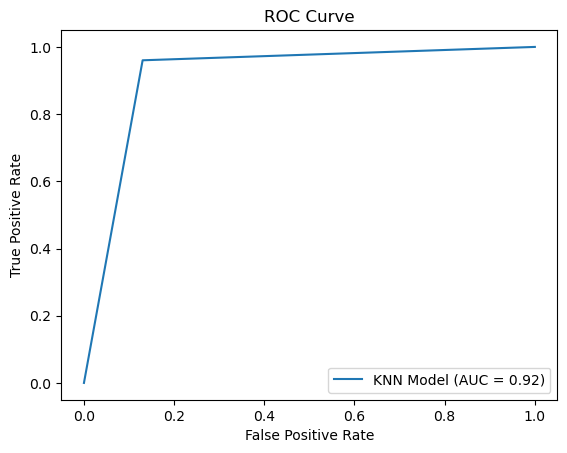

In [186]:
## ROC Curve
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr_opt, tpr_opt, _ = roc_curve(y_val, opt_y_val_pred)
roc_auc_opt = auc(fpr_opt, tpr_opt)

plt.figure(figsize=(8, 6))
roc_display_temp = RocCurveDisplay(fpr=fpr_opt, tpr=tpr_opt, roc_auc=roc_auc_opt, estimator_name='KNN Model').plot()
plt.title("ROC Curve")
plt.show()

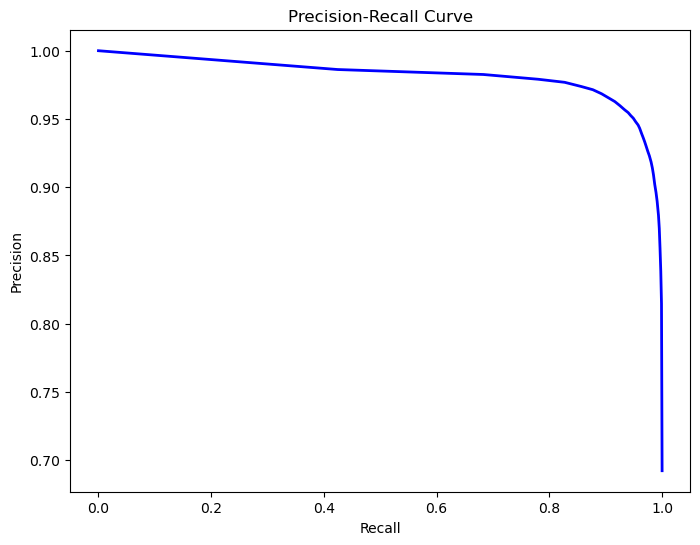

In [187]:
## Precision-Recall Curve

precision_opt, recall_opt, _ = precision_recall_curve(y_val, knn_optimal.predict_proba(opt_X_val_scaled)[:, 1])  # Fixed this line

plt.figure(figsize=(8, 6))
plt.plot(recall_opt, precision_opt, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

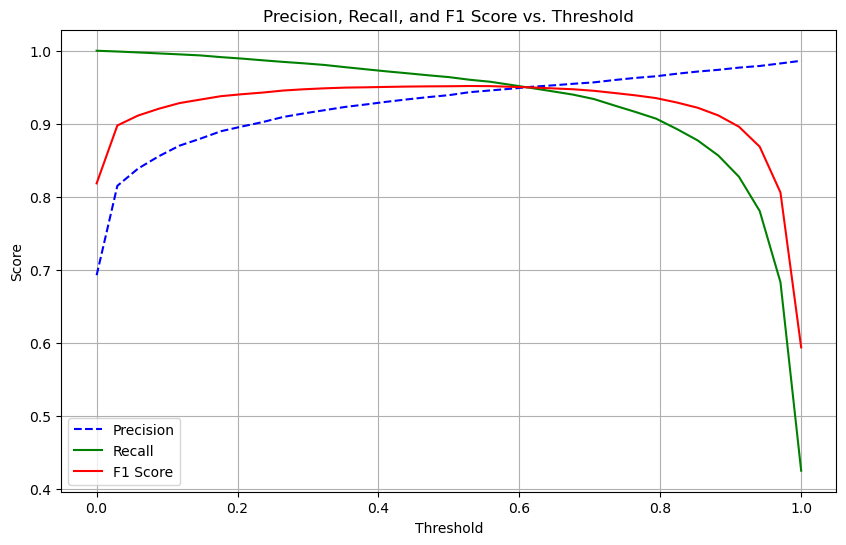

In [188]:
## F1-Score

# Get the probability estimates of the positive class
y_scores_opt = knn_optimal.predict_proba(opt_X_val_scaled)[:, 1]

# Get precision-recall values for different thresholds
precision_opt, recall_opt, thresholds_opt = precision_recall_curve(y_val, y_scores_opt)

# Calculate F1 score
f1_scores_opt = 2 * (precision_opt * recall_opt) / (precision_opt + recall_opt)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds_opt, precision_opt[:-1], 'b--', label='Precision')
plt.plot(thresholds_opt, recall_opt[:-1], 'g-', label='Recall')
plt.plot(thresholds_opt, f1_scores_opt[:-1], 'r-', label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [189]:
## Accuracy Calculation
accuracy_temp = accuracy_score(y_val, opt_y_val_pred)
print(f"Accuracy of fine-tuned KNN model: {accuracy_temp:.8f}")

Accuracy of fine-tuned KNN model: 0.93241521


### Dummy Classifier

In [190]:
## Train-Test Split
#Import necesary Libraries
from sklearn.model_selection import train_test_split

X = df_encoded
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y_enc, test_size=0.2, random_state=42)

In [191]:
# Create a dummy classifier
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='stratified', random_state=42)  # 'stratified' means random predictions based on training distribution
dummy_clf.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [192]:
# Predict on test set
dummy_y_pred = dummy_clf.predict(X_test)

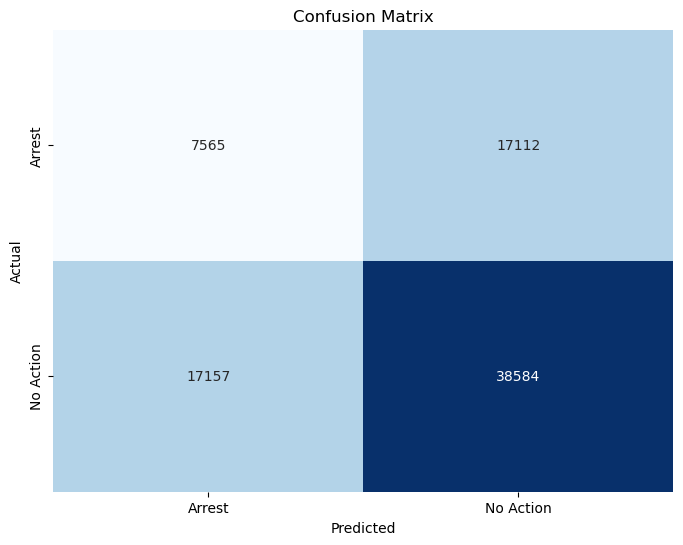

In [193]:
## Confusion Matrix for Dummy Classifier
# compute confusion matrix
labels = ['Arrest', 'No Action']
cm_dummy = confusion_matrix(y_test, dummy_y_pred)

# ploting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dummy, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 800x600 with 0 Axes>

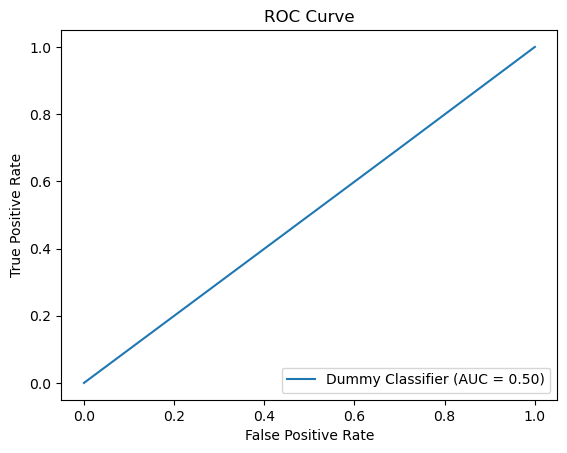

In [194]:
## ROC Curve
fpr_dum, tpr_dum, _ = roc_curve(y_test, dummy_y_pred)
roc_auc_dum = auc(fpr_dum, tpr_dum)

plt.figure(figsize=(8, 6))
roc_display_temp = RocCurveDisplay(fpr=fpr_dum, tpr=tpr_dum, roc_auc=roc_auc_dum, estimator_name='Dummy Classifier').plot()
plt.title("ROC Curve")
plt.show()

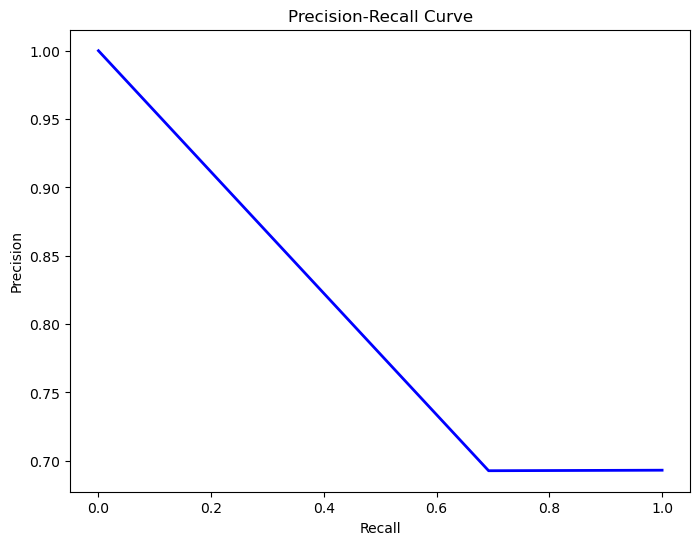

In [195]:
## Precision-Recall Curve

precision_dum, recall_dum, _ = precision_recall_curve(y_test, dummy_clf.predict_proba(X_test)[:, 1])  # Fixed this line

plt.figure(figsize=(8, 6))
plt.plot(recall_dum, precision_dum, color='b', lw=2) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

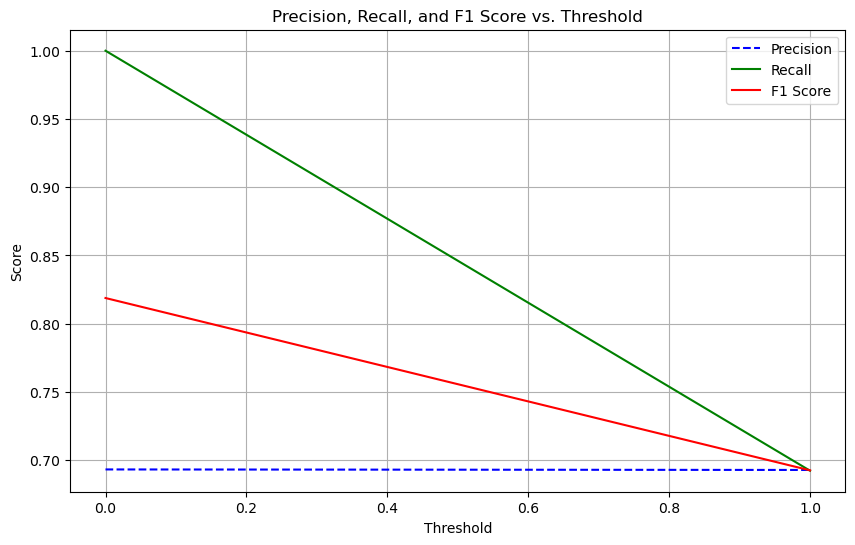

In [196]:
## F1-Score

# Get the probability estimates of the positive class
y_scores_dum = dummy_clf.predict_proba(X_test)[:, 1]

# Get precision-recall values for different thresholds
precision_dum, recall_dum, thresholds_dum = precision_recall_curve(y_test, y_scores_dum)

# Calculate F1 score
f1_scores_dum = 2 * (precision_dum * recall_dum) / (precision_dum + recall_dum)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds_dum, precision_dum[:-1], 'b--', label='Precision')
plt.plot(thresholds_dum, recall_dum[:-1], 'g-', label='Recall')
plt.plot(thresholds_dum, f1_scores_dum[:-1], 'r-', label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [197]:
## Accuracy Calculation
accuracy_temp = accuracy_score(y_test, dummy_y_pred)
print(f"Accuracy of Dummy Classifier: {accuracy_temp:.8f}")

Accuracy of Dummy Classifier: 0.57386406


In [198]:
# Calculate and display accuracy for a detailed performance breakdown
print("\nClassification Report for Dummy Classifier:\n")
print(classification_report(y_test, dummy_y_pred))


Classification Report for Dummy Classifier:

              precision    recall  f1-score   support

           0       0.31      0.31      0.31     24677
           1       0.69      0.69      0.69     55741

    accuracy                           0.57     80418
   macro avg       0.50      0.50      0.50     80418
weighted avg       0.57      0.57      0.57     80418



### Classification and Evaluation Logistic Regression and KNN Classifier

In [199]:
## Classification and Evaluation LogReg and KNN
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

def compute_metrics(true_labels, predicted_labels):
    # Confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    # Other metrics
    recall = recall_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)

    return TP, TN, FP, FN, recall, precision, f1, accuracy

# Compute for fine-tuned KNN
knn_metrics = compute_metrics(y_val, opt_y_val_pred) 

# Compute for fine-tuned LogReg
logreg_metrics = compute_metrics(y_test, ini_y_pred_test)

# Convert pandas
df_metrics = pd.DataFrame({
    'Metrics': ['TP', 'TN', 'FP', 'FN', 'Recall', 'Precision', 'F1', 'Accuracy'],
    'Fine-tuned KNN': knn_metrics,
    'Fine-tuned LogReg': logreg_metrics
})

# Print
df_metrics

,Metrics,Fine-tuned KNN,Fine-tuned LogReg
0,TP,42768.000000,53969.000000
1,TN,17218.000000,20480.000000
2,FP,2576.000000,4197.000000
3,FN,1772.000000,1772.000000
4,Recall,0.960216,0.968210
5,Precision,0.943190,0.927844
6,F1,0.951627,0.947598
7,Accuracy,0.932415,0.925775


#### The Accuracy of both models are nearly same. However, by a narrow margin we decided to use knn.

## driver_age 가 continous 해서 5개로 그루핑함!

In [217]:
# Predicting on validation set
knn_y_val_pred = knn_optimal.predict(opt_X_val_scaled)

# Create a function to compute tt, tf, ft, and ff for any group
def compute_metrics_for_group(group, true_labels, predicted_labels):
    group_true_labels = true_labels[group]
    group_predicted_labels = predicted_labels[group]
    
    tt = sum((group_true_labels == 1) & (group_predicted_labels == 1))
    tf = sum((group_true_labels == 1) & (group_predicted_labels == 0))
    ft = sum((group_true_labels == 0) & (group_predicted_labels == 1))
    ff = sum((group_true_labels == 0) & (group_predicted_labels == 0))
    
    return tt, tf, ft, ff

In [218]:
# Compute 'driver_gender'
gender_group = X_val['driver_gender'] == 1
tt_gender, tf_gender, ft_gender, ff_gender = compute_metrics_for_group(gender_group, y_val, opt_y_val_pred)


# Create a pandas dataframe for the results
results_gender = {
    "Metrics": ["TT", "TF", "FT", "FF"],
    "driver_gender": [tt_gender, tf_gender, ft_gender, ff_gender],
    # "driver_age": ...,
    # "driver_race": ...
}

df_results_gender = pd.DataFrame(results_gender)

# Print
df_results_gender

,Metrics,driver_gender
0,TT,40746
1,TF,1314
2,FT,2008
3,FF,14192


In [219]:
## Compute for 'driver_age'

# Create age groups
bins = [0, 20, 40, 60, 80, np.inf]
labels = ["0-20", "21-40", "41-60", "61-80", "81+"]
X_val['age_group'] = pd.cut(X_val['driver_age'], bins=bins, labels=labels, right=False)

# Compute for 'driver_age'
age_group_labels = labels
results_age = {"Metrics": ["TT", "TF", "FT", "FF"]}

for age_label in age_group_labels:
    age_group = X_val['age_group'] == age_label
    tt_age, tf_age, ft_age, ff_age = compute_metrics_for_group(age_group, y_val, opt_y_val_pred)
    results_age[f"driver_age_{age_label}"] = [tt_age, tf_age, ft_age, ff_age]

df_results_age = pd.DataFrame(results_age)
# Print
df_results_age

,Metrics,driver_age_0-20,driver_age_21-40,driver_age_41-60,driver_age_61-80,driver_age_81+
0,TT,322,12046,24859,5454,87
1,TF,161,1105,437,67,2
2,FT,120,1438,901,113,4
3,FF,1093,11428,4305,387,5


In [220]:
# Compute for each 'driver_race' column
race_columns = ['driver_race_Asian', 'driver_race_Black', 'driver_race_Hispanic', 'driver_race_Other', 'driver_race_White']
results_race = {"Metrics": ["TT", "TF", "FT", "FF"]}

for col in race_columns:
    race_group = X_val[col] == 1  
    tt_race, tf_race, ft_race, ff_race = compute_metrics_for_group(race_group, y_val, opt_y_val_pred)
    results_race[col] = [tt_race, tf_race, ft_race, ff_race]

df_results_race = pd.DataFrame(results_race)

# Print
df_results_race

,Metrics,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White
0,TT,177,10588,1693,670,29640
1,TF,17,503,211,78,963
2,FT,19,730,242,61,1524
3,FF,86,4799,2730,455,9148


### Independence check using Chi Square

In [221]:
# Binning driver_age column
age_bins = [0, 20, 40, 60, 80, np.inf]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81+']
df_encoded['age_group'] = pd.cut(df_encoded['driver_age'], bins=age_bins, labels=age_labels, right=False)


In [222]:
from scipy.stats import chi2_contingency

# Initialize dataframe
chi2_results = pd.DataFrame(columns=['Feature', 'Chi2 Statistic', 'P-value'])

# For 'driver_gender'
contingency_gender = pd.crosstab(df_encoded['driver_gender'], y)
chi2, p, _, _ = chi2_contingency(contingency_gender)
new_row = pd.DataFrame({'Feature': ['driver_gender'], 'Chi2 Statistic': [chi2], 'P-value': [p]})
chi2_results = pd.concat([chi2_results, new_row], ignore_index=True)


In [223]:
# For 'age_group'
contingency_age = pd.crosstab(df_encoded['age_group'], y)
chi2, p, _, _ = chi2_contingency(contingency_age)
new_row = pd.DataFrame({'Feature': ['driver_age'], 'Chi2 Statistic': [chi2], 'P-value': [p]})
chi2_results = pd.concat([chi2_results, new_row], ignore_index=True)

In [224]:
# For the one-hot encoded 'driver_race' columns
race_columns = ['driver_race_Asian', 'driver_race_Black', 'driver_race_Hispanic', 'driver_race_Other', 'driver_race_White']
for col in race_columns:
    contingency_race = pd.crosstab(df_encoded[col], y)
    chi2, p, _, _ = chi2_contingency(contingency_race)
    new_row = pd.DataFrame({'Feature': [col], 'Chi2 Statistic': [chi2], 'P-value': [p]})
    chi2_results = pd.concat([chi2_results, new_row], ignore_index=True)

chi2_results['-log10(P-value)'] = [-np.log10(p) if p > 0 else 100 for p in chi2_results['P-value']]

In [249]:
# Print
chi2_results

,Feature,Chi2 Statistic,P-value,Cells < 5,-log10(P-value)
0,driver_gender,14769.422014,0.000000e+00,0,100.000000
1,driver_age,59958.061574,0.000000e+00,0,100.000000
2,driver_race_Asian,21.473541,3.587446e-06,0,5.445215
3,driver_race_Black,321.300029,7.546205e-72,0,71.122271
4,driver_race_Hispanic,13689.947587,0.000000e+00,0,100.000000
5,driver_race_Other,414.472249,3.896238e-92,0,91.409355
6,driver_race_White,7714.467471,0.000000e+00,0,100.000000


In [250]:
chi2_results['-log10(P-value)']

0    100.000000
1    100.000000
2      5.445215
3     71.122271
4    100.000000
5     91.409355
6    100.000000
Name: -log10(P-value), dtype: float64

In [229]:
# Set and log scale alpha value
alpha = 0.05
alpha_scaled = -np.log10(alpha)

In [230]:
# Check Indepence
for _, row in chi2_results.iterrows():
    col = row['Feature']
    p_scaled = row['-log10(P-value)']
    
    if p_scaled > alpha_scaled: # If p < alpha: -log10(p) > -log10(alpha)
        print(f"{col} is dependent. Null hypothesis rejected.")
    else:
        print(f"{col} is independent. Null hypothesis not rejected.")

driver_gender is dependent. Null hypothesis rejected.
driver_age is dependent. Null hypothesis rejected.
driver_race_Asian is dependent. Null hypothesis rejected.
driver_race_Black is dependent. Null hypothesis rejected.
driver_race_Hispanic is dependent. Null hypothesis rejected.
driver_race_Other is dependent. Null hypothesis rejected.
driver_race_White is dependent. Null hypothesis rejected.


### Separation

#### To compute separation using chi-square:

1. Build a contingency table for each predictor with the binary outcome.
2. Compute the chi-square statistic for each table.
3. Compare the chi-square values to determine which predictors have the strongest association with the outcome.

In [248]:
features_of_interest = [
    'driver_gender', 
    'driver_age', 
    'driver_race_White', 
    'driver_race_Asian', 
    'driver_race_Hispanic', 
    'driver_race_Black', 
    'driver_race_Other'
]

filtered_results = chi2_results[chi2_results['Feature'].isin(features_of_interest)]

# Sort the dataframe 
sorted_results = filtered_results.sort_values(by='Chi2 Statistic', ascending=False)

# Print Separation
print(f"\nRank of Separation Power of Each Columns.\n")
sorted_results[['Feature', 'Chi2 Statistic']]



Rank of Separation Power of Each Columns.



,Feature,Chi2 Statistic
1,driver_age,59958.061574
0,driver_gender,14769.422014
4,driver_race_Hispanic,13689.947587
6,driver_race_White,7714.467471
5,driver_race_Other,414.472249
3,driver_race_Black,321.300029
2,driver_race_Asian,21.473541


### Sufficiency
> Using Info Entropy

In [237]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

def calculate_sufficiency(feature_data, target_data):
    # Convert target_data
    target_data = pd.Series(target_data)
    
    # Create contingency table
    contingency_table = pd.crosstab(target_data, feature_data)
    
    # Calculate entropy
    target_entropy = entropy(target_data.value_counts(normalize=True), base=2)
    conditional_entropy = 0
    for category in contingency_table.columns:
        category_prob = feature_data.value_counts(normalize=True)[category]
        category_entropy = entropy(contingency_table[category] / contingency_table[category].sum(), base=2)
        conditional_entropy += category_prob * category_entropy
    
    # Calculate sufficiency
    sufficiency = target_entropy - conditional_entropy
    return sufficiency


In [240]:
# Target Columns
features = [
    'driver_gender', 
    'driver_age', 
    'driver_race_White', 
    'driver_race_Asian', 
    'driver_race_Hispanic', 
    'driver_race_Black', 
    'driver_race_Other'
]

# Print
for feature in features:
    sufficiency_score = calculate_sufficiency(df_encoded[feature], y_enc)
    print(f"Sufficiency Score for {feature}:", sufficiency_score)

Sufficiency Score for driver_gender: 0.02430174904880844
Sufficiency Score for driver_age: 0.15151302226830687
Sufficiency Score for driver_race_White: 0.01361586130872583
Sufficiency Score for driver_race_Asian: 3.7888971291089035e-05
Sufficiency Score for driver_race_Hispanic: 0.022404685477582675
Sufficiency Score for driver_race_Black: 0.0005718912464787174
Sufficiency Score for driver_race_Other: 0.0007080847073013263


### y 인지 y_enc 인지는 인사이트에 따라 다르대 근데 일단 우리는 y 랑 y_enc랑 결과 같음

In [242]:
# Target Columns
features = [
    'driver_gender', 
    'driver_age', 
    'driver_race_White', 
    'driver_race_Asian', 
    'driver_race_Hispanic', 
    'driver_race_Black', 
    'driver_race_Other'
]

# Print
for feature in features:
    sufficiency_score = calculate_sufficiency(df_encoded[feature], y) 
    print(f"Sufficiency Score for {feature}:", sufficiency_score)

Sufficiency Score for driver_gender: 0.02430174904880844
Sufficiency Score for driver_age: 0.15151302226830687
Sufficiency Score for driver_race_White: 0.01361586130872583
Sufficiency Score for driver_race_Asian: 3.7888971291089035e-05
Sufficiency Score for driver_race_Hispanic: 0.022404685477582675
Sufficiency Score for driver_race_Black: 0.0005718912464787174
Sufficiency Score for driver_race_Other: 0.0007080847073013263


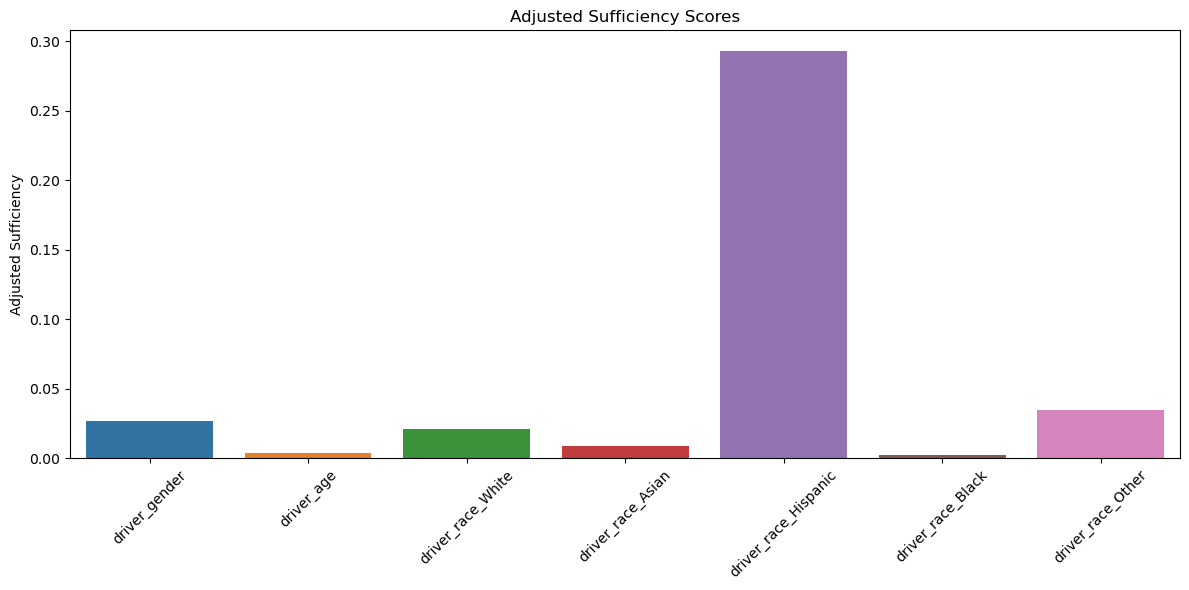

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original Suff score
scores = [calculate_sufficiency(df_encoded[feature], y_enc) for feature in features]
adjusted_scores = [score / df_encoded[feature].mean() for score, feature in zip(scores, features)]

# Plott
plt.figure(figsize=(12, 6))
sns.barplot(x=features, y=adjusted_scores)
plt.title('Adjusted Sufficiency Scores')
plt.xticks(rotation=45)
plt.ylabel('Adjusted Sufficiency')
plt.tight_layout()
plt.show()

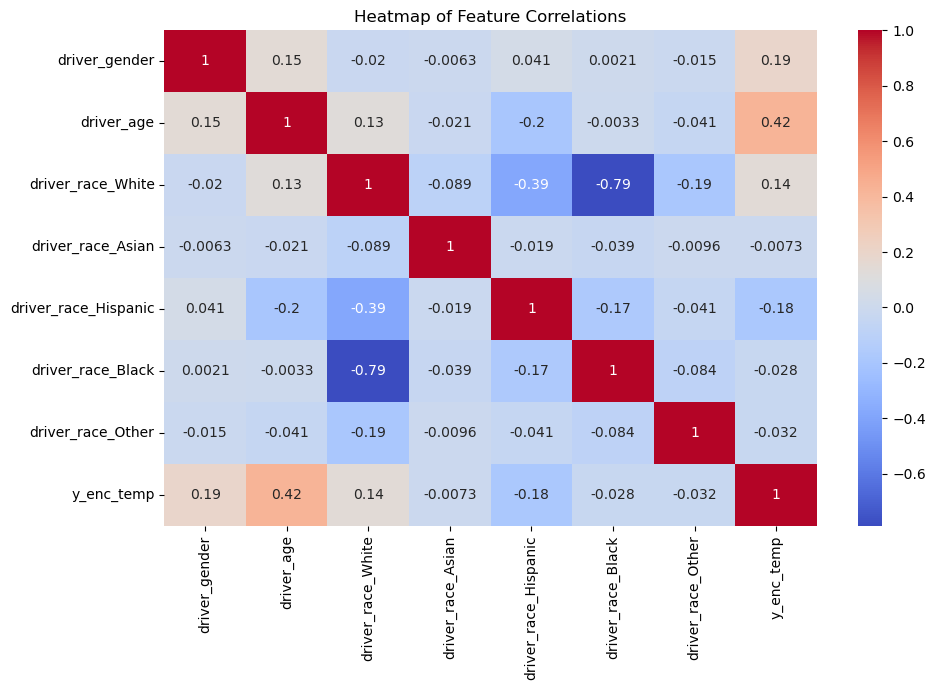

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add y_enc temporarily
df_encoded['y_enc_temp'] = y_enc

# Subset dataset to include y_enc_temp
subset = df_encoded[features + ['y_enc_temp']]


correlations = subset.corr()

# potl
plt.figure(figsize=(10, 7))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.tight_layout()
plt.show()

# Drop temp col
df_encoded.drop('y_enc_temp', axis=1, inplace=True)